In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12310, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 12310 (delta 21), reused 35 (delta 20), pack-reused 12274
Receiving objects: 100% (12310/12310), 11.47 MiB | 23.87 MiB/s, done.
Resolving deltas: 100% (8556/8556), done.


In [2]:
pip install -r yolov5/requirements.txt

     |████████████████████████████████| 596 kB 5.3 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
import torch
from IPython.display import Image
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
random.seed(108)

In [5]:
imgPath = "yolov5/images"
annPath = "yolov5/labels"

images = [os.path.join(imgPath, x) for x in os.listdir(imgPath)]
annotations = [os.path.join(annPath, x) for x in os.listdir(annPath) if x[-3:] == "txt"]


images.sort()
annotations.sort()

# print(len(annotations))

train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
!mkdir yolov5/images/train yolov5/images/val yolov5/images/test yolov5/labels/train yolov5/labels/val yolov5/labels/test

In [7]:
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

move_files_to_folder(train_images, 'yolov5/images/train')
move_files_to_folder(val_images, 'yolov5/images/val/')
move_files_to_folder(test_images, 'yolov5/images/test/')
move_files_to_folder(train_annotations, 'yolov5/labels/train/')
move_files_to_folder(val_annotations, 'yolov5/labels/val/')
move_files_to_folder(test_annotations, 'yolov5/labels/test/')

In [8]:
cd yolov5/

/content/yolov5


In [9]:
!python train.py --img 640 --cfg yolov5s.yaml --hyp hyp.scratch-low.yaml --batch 32 --epochs 50 --data auto.yaml --weights yolov5s.pt --workers 24 --name auto_det

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=auto.yaml, hyp=hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=runs/train, name=auto_det, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
Traceback (most recent call last):
  File "train.py", line 643, in <module>
    main(opt)
  File "train.py", line 516, in main
    check_file(opt.data), check_yaml(opt.cfg), check_yaml(opt.hyp), str(opt.weights), str(opt.project)  # checks
  File "/content/yolov5/utils/general.py", line 406, in check_file
    assert len(files), f'File not found: {file}'  # assert 

In [ ]:
!python detect.py --source images/test/ --weights runs/train/auto_det/weights/best.pt --conf 0.40 --name auto

detect: weights=['runs/train/auto_det/weights/best.pt'], source=images/test/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=auto, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-73-gd51f9b2 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/16 /content/yolov5/images/test/Datacluster Auto (103).jpg: 640x480 1 auto, Done. (0.030s)
image 2/16 /content/yolov5/images/test/Datacluster Auto (125).jpg: 640x480 1 auto, Done. (0.030s)
image 3/16 /content/yolov5/images/test/Datacluster Auto (127).jpg: 640x480 1 auto, Done. (0.030s)
image 4/16 /content/yolov5/images/test/Datacluster Auto (136).jpg: 640x480 1 aut

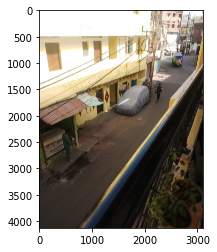

In [ ]:
detections_dir = "runs/detect/auto2/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))